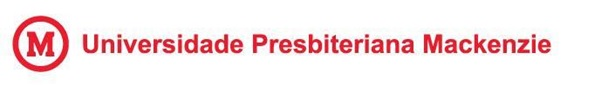

Projeto Aplicado Turma A Alunas:

CAMILLA SEMENZZATTO CAVALCANTE - RA 10423722

CAROLINA IACONELLI - RA 10424853

ISABELLE DOS SANTOS SANTANA - RA 10416118

MARISTELA PEDRO COELHO - RA 10424465

IMPORTANDO BIBLIOTECAS EXPLORATÓRIAS DO PYTHON

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns




# Informações sobre a Utlização do cartão de crédito

Base de dados sobre a utilização de cartão de crédito durante os períodos de 2018 até 2023

Fonte do Dado:https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/aplicacao#!/recursos/Quantidadeetransacoesdecartoes

In [3]:
dados_cartoes= pd.read_csv('/content/Estoque.csv', sep=';')

In [4]:
dados=dados_cartoes.drop(columns=['Unnamed: 10','Unnamed: 11'] )

In [5]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
0,20213,Bandeira propria,Credito,Basico Nacional,1938972,535612,2741493,521339586,0,0
1,20232,VISA,Credito,Empresarial,3521641,2173436,41594872,12547655589,468389,396967163
2,20213,VISA,Debito,Intermediario,3745393,2347388,59581444,4814915281,490,101639
3,20211,MasterCard,Debito,Basico Internacional,83088117,21554284,567370086,39064611986,27511,9502222
4,20211,MasterCard,Credito,Premium,2197074,1785104,107175156,21107092218,1234605,631224037


In [6]:
dados.columns

Index(['trimestre', 'nomeBandeira', 'nomeFuncao', 'produto',
       'qtdCartoesEmitidos', 'qtdCartoesAtivos', 'qtdTransacoesNacionais',
       'valorTransacoesNacionais', 'qtdTransacoesInternacionais',
       'valorTransacoesInternacionais'],
      dtype='object')

In [7]:
dados.dtypes

trimestre                         int64
nomeBandeira                     object
nomeFuncao                       object
produto                          object
qtdCartoesEmitidos                int64
qtdCartoesAtivos                  int64
qtdTransacoesNacionais            int64
valorTransacoesNacionais          int64
qtdTransacoesInternacionais       int64
valorTransacoesInternacionais     int64
dtype: object

In [8]:
dados.shape

(1630, 10)

In [9]:
dados.nunique()

trimestre                          24
nomeBandeira                        8
nomeFuncao                          3
produto                             8
qtdCartoesEmitidos               1616
qtdCartoesAtivos                 1601
qtdTransacoesNacionais           1606
valorTransacoesNacionais         1613
qtdTransacoesInternacionais      1163
valorTransacoesInternacionais    1247
dtype: int64

In [10]:
dados.duplicated().sum()

0

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   trimestre                      1630 non-null   int64 
 1   nomeBandeira                   1630 non-null   object
 2   nomeFuncao                     1630 non-null   object
 3   produto                        1630 non-null   object
 4   qtdCartoesEmitidos             1630 non-null   int64 
 5   qtdCartoesAtivos               1630 non-null   int64 
 6   qtdTransacoesNacionais         1630 non-null   int64 
 7   valorTransacoesNacionais       1630 non-null   int64 
 8   qtdTransacoesInternacionais    1630 non-null   int64 
 9   valorTransacoesInternacionais  1630 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 127.5+ KB


In [12]:
dados.describe()

,trimestre,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
count,1630.000000,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03,1.630000e+03
mean,20208.574233,1.212208e+07,4.971591e+06,1.082023e+08,8.900494e+09,3.446622e+05,1.167607e+08
std,17.151055,2.798092e+07,1.091243e+07,2.251019e+08,1.703302e+10,8.979939e+05,3.364437e+08
min,20181.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20193.000000,2.506152e+05,1.145920e+05,1.786496e+06,2.265293e+08,4.000000e+00,8.980000e+02
50%,20211.000000,1.511627e+06,6.270850e+05,1.307913e+07,1.528504e+09,4.614500e+03,1.454510e+06
75%,20223.000000,9.749103e+06,4.059627e+06,7.744801e+07,7.732956e+09,1.648348e+05,4.440859e+07
max,20234.000000,2.084751e+08,1.202561e+08,1.452559e+09,1.414362e+11,7.202596e+06,3.788746e+09


In [13]:
## Exporando os tipos de Bandeiras dos Cartões de Crédito

In [14]:
dados.nomeBandeira.unique()


array(['Bandeira propria', 'VISA', 'MasterCard', 'Elo',
       'American Express', 'Outras', 'Hipercard', 'Diners Club'],
      dtype=object)

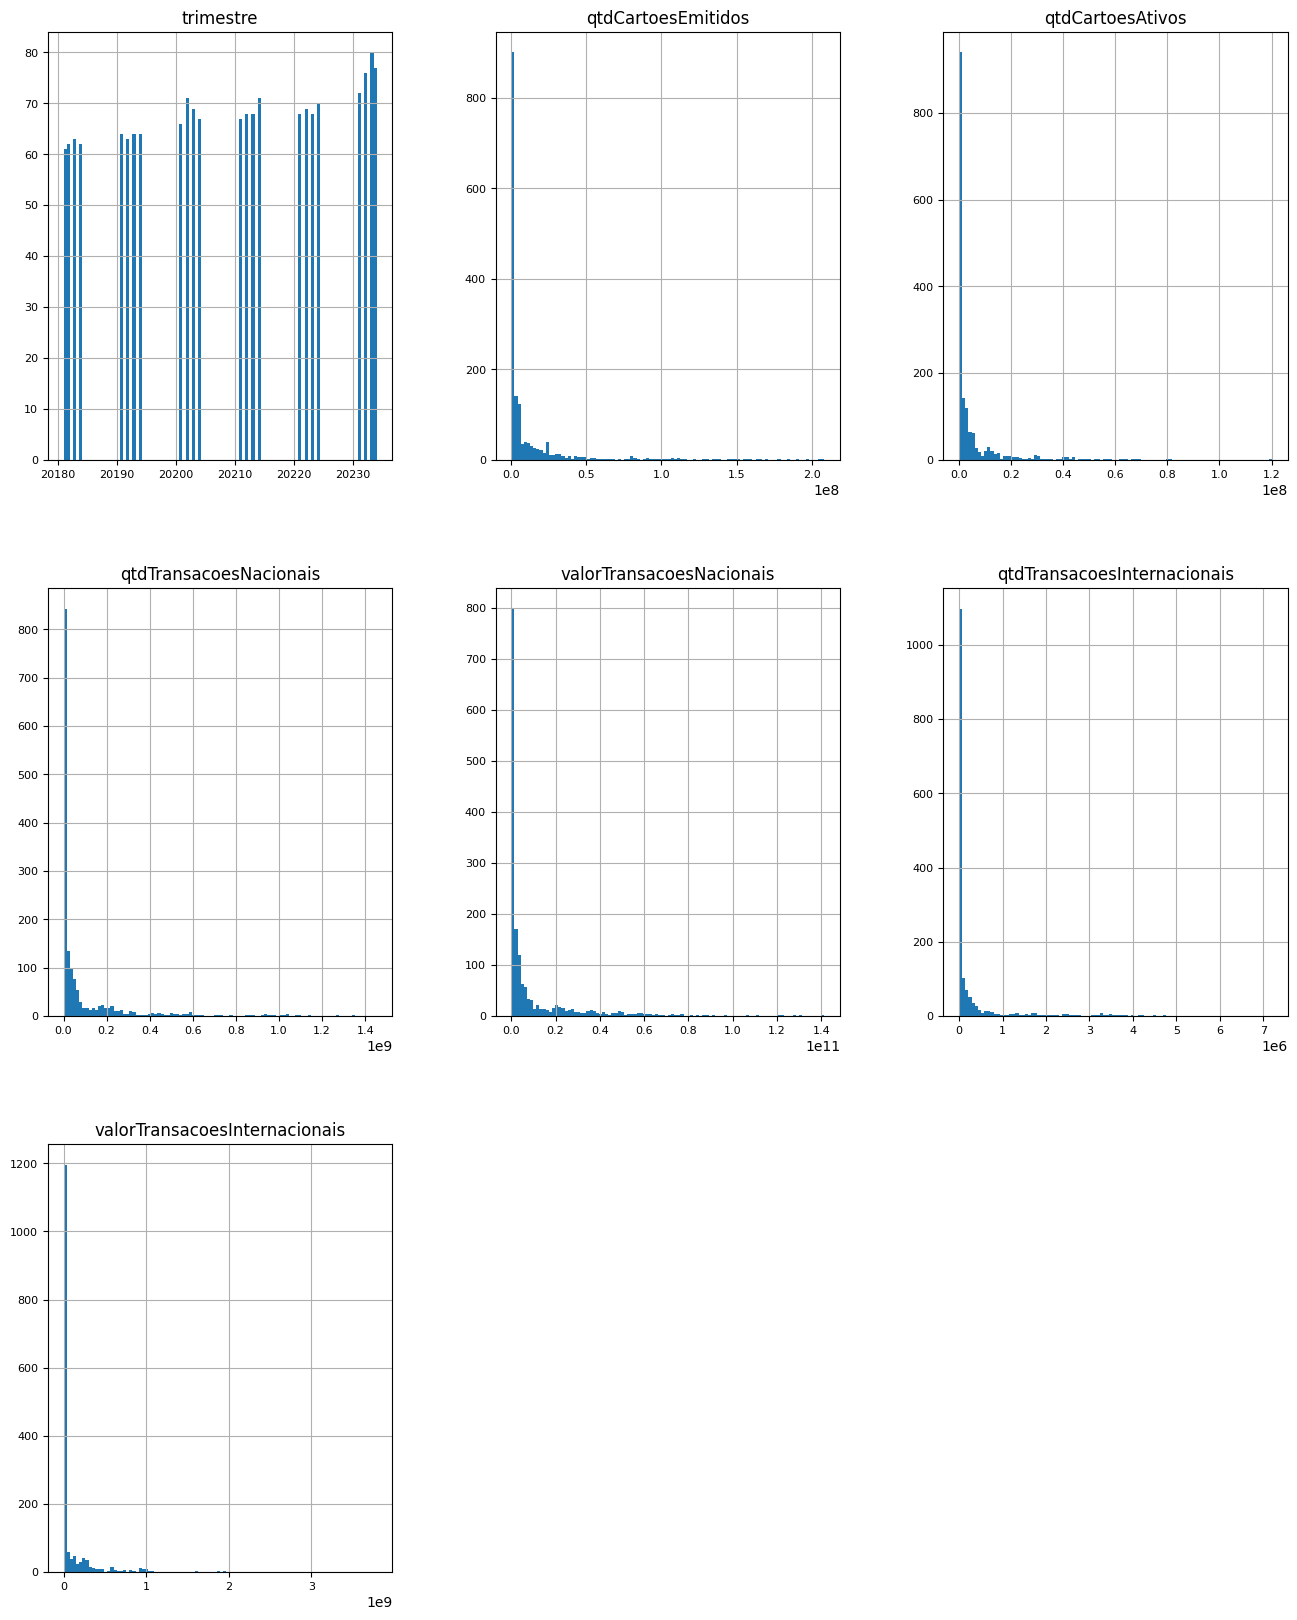

In [15]:
dados.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

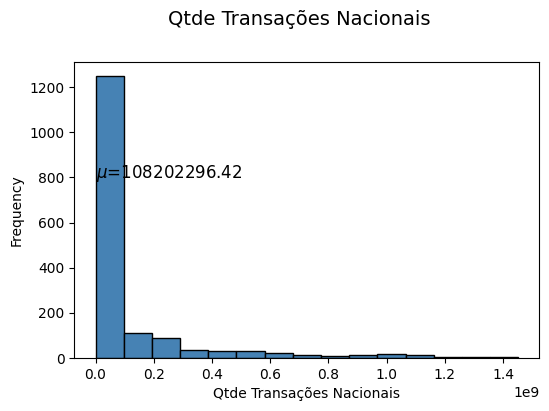

In [16]:
# Histograma
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Qtde Transações Nacionais")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(dados['qtdTransacoesNacionais'].mean(),2)),
         fontsize=12)
freq, bins, patches = ax.hist(dados['qtdTransacoesNacionais'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


<ipython-input-17-ef0de7a56b27>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')


<Axes: xlabel='Qtde Transações Nacionais', ylabel='Frequency'>

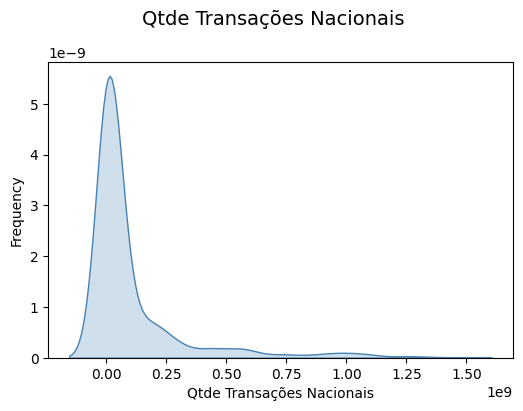

In [17]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Qtde Transações Nacionais", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Qtde Transações Nacionais")
ax1.set_ylabel("Frequency")
sns.kdeplot(dados['qtdTransacoesNacionais'], ax=ax1, shade=True, color='steelblue')

In [18]:
##Separando por Tipo de Bandeira

In [19]:
dados['nomeBandeira'].value_counts().sort_index()


nomeBandeira
American Express    122
Bandeira propria     88
Diners Club           4
Elo                 299
Hipercard            37
MasterCard          519
Outras               67
VISA                494
Name: count, dtype: int64

Text(0, 0.5, 'Valor Transações Nacionais')

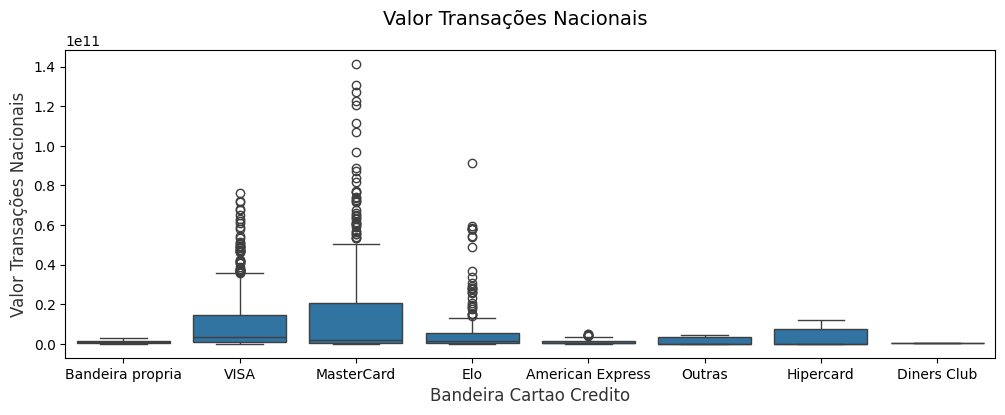

In [20]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais', fontsize=14)

sns.boxplot(x="nomeBandeira", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Bandeira Cartao Credito",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais",size = 12,alpha=0.8)

In [21]:
dados['ano'] = dados['trimestre']//10


In [22]:
dados.head()

,trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais,ano
0,20213,Bandeira propria,Credito,Basico Nacional,1938972,535612,2741493,521339586,0,0,2021
1,20232,VISA,Credito,Empresarial,3521641,2173436,41594872,12547655589,468389,396967163,2023
2,20213,VISA,Debito,Intermediario,3745393,2347388,59581444,4814915281,490,101639,2021
3,20211,MasterCard,Debito,Basico Internacional,83088117,21554284,567370086,39064611986,27511,9502222,2021
4,20211,MasterCard,Credito,Premium,2197074,1785104,107175156,21107092218,1234605,631224037,2021


Text(0, 0.5, 'Valor Transações Nacionais')

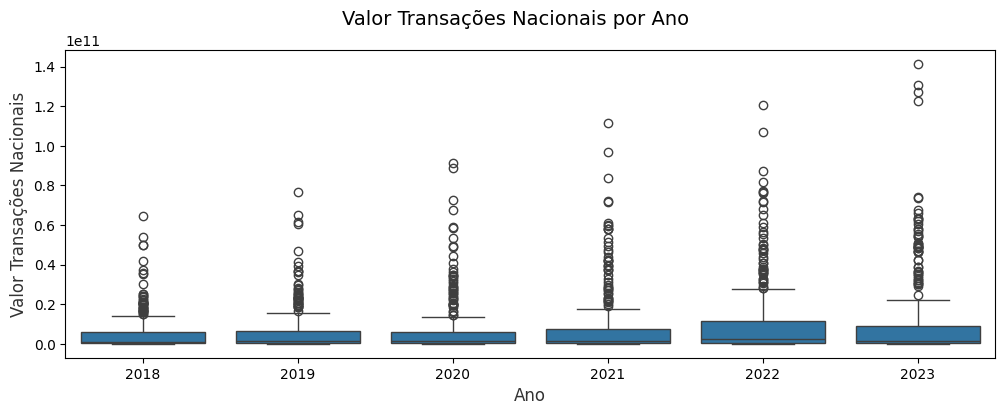

In [23]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Nacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesNacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Nacionais",size = 12,alpha=0.8)

Text(0, 0.5, 'Valor Transações Internacionais')

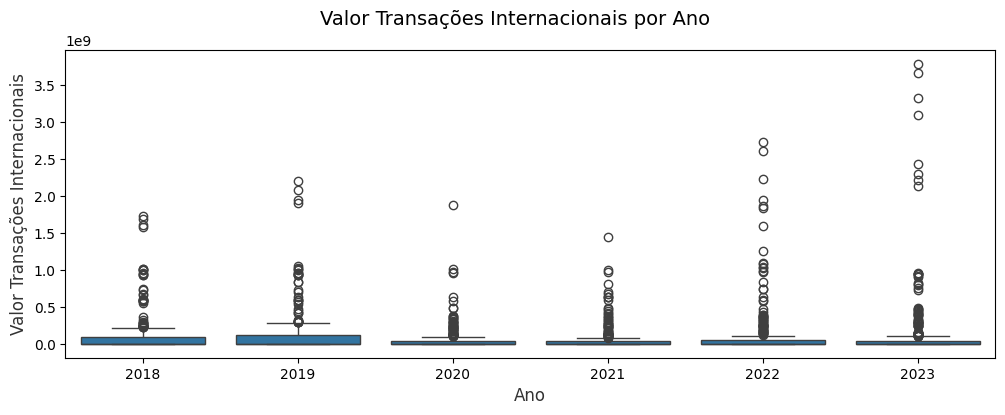

In [24]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Valor Transações Internacionais por Ano', fontsize=14)

sns.boxplot(x="ano", y="valorTransacoesInternacionais", data=dados,  ax=ax)
ax.set_xlabel("Ano",size = 12,alpha=0.8)
ax.set_ylabel("Valor Transações Internacionais",size = 12,alpha=0.8)

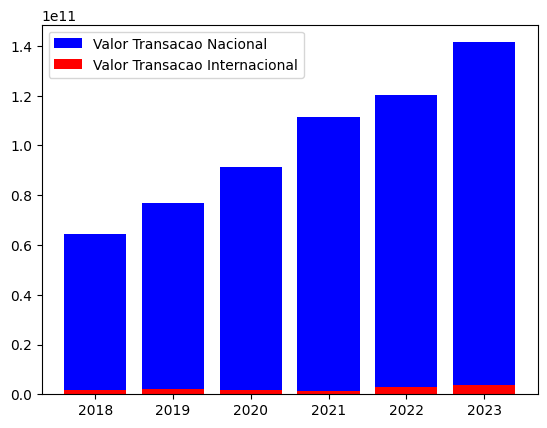

In [25]:
plt.bar(dados['ano'],dados['valorTransacoesNacionais'],label='Valor Transacao Nacional',color='blue')
plt.bar(dados['ano'],dados['valorTransacoesInternacionais'],label='Valor Transacao Internacional',color='red')
plt.legend()
plt.show()



<Axes: >

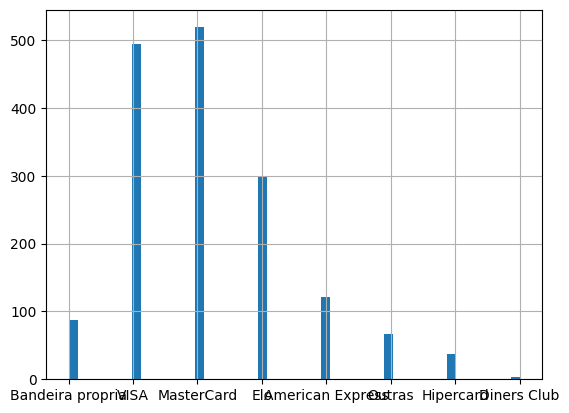

In [26]:
dados['nomeBandeira'].hist(bins = 50)

# Análise da utilizacao do PIX dos anos de 2019 até 2023



Fonte de dados: https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/aplicacao#!/recursos/MeiosdePagamentosMensalDA#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwfX0=

In [30]:
dados_pix= pd.read_excel('/content/PIX Municipio.xlsx')

In [35]:
dados_pix.head()

,Ano2,Mes,Municipio_Ibge,Municipio,Estado_Ibge,Estado,Sigla_Regiao,Regiao,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
0,2023,12,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,6.077282e+10,228750540,2.006382e+11,126799793,6.632730e+10,156754806,1.957763e+11,498519368
1,2024,3,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.789138e+10,226595220,2.222841e+11,142656893,6.134924e+10,150033005,2.147715e+11,562585516
2,2024,2,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.255003e+10,203645803,1.748611e+11,123114297,5.622909e+10,135096158,1.692570e+11,480759515
3,2023,11,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.254869e+10,200156589,1.817061e+11,126590329,5.617374e+10,138229772,1.756099e+11,512794393
4,2024,1,3550308.0,SÃO PAULO,35.0,SÃO PAULO,SE,SUDESTE,5.224657e+10,200528238,1.844834e+11,125074544,5.586060e+10,131279717,1.794997e+11,480566176


In [36]:
dados_pix.columns

Index(['Ano2', 'Mes', 'Municipio_Ibge', 'Municipio', 'Estado_Ibge', 'Estado',
       'Sigla_Regiao', 'Regiao', 'VL_PagadorPF', 'QT_PagadorPF',
       'VL_PagadorPJ', 'QT_PagadorPJ', 'VL_RecebedorPF', 'QT_RecebedorPF',
       'VL_RecebedorPJ', 'QT_RecebedorPJ'],
      dtype='object')

In [37]:
dados_pix.dtypes

Ano2                int64
Mes                 int64
Municipio_Ibge    float64
Municipio          object
Estado_Ibge       float64
Estado             object
Sigla_Regiao       object
Regiao             object
VL_PagadorPF      float64
QT_PagadorPF        int64
VL_PagadorPJ      float64
QT_PagadorPJ        int64
VL_RecebedorPF    float64
QT_RecebedorPF      int64
VL_RecebedorPJ    float64
QT_RecebedorPJ      int64
dtype: object

In [38]:
dados_pix.shape

(233898, 16)

In [39]:
dados_pix.nunique()

Ano2                   5
Mes                   12
Municipio_Ibge      5568
Municipio           5297
Estado_Ibge           27
Estado                28
Sigla_Regiao           5
Regiao                 6
VL_PagadorPF      233886
QT_PagadorPF      132477
VL_PagadorPJ      233196
QT_PagadorPJ       44612
VL_RecebedorPF    233892
QT_RecebedorPF    120472
VL_RecebedorPJ    233260
QT_RecebedorPJ     63955
dtype: int64

In [41]:
dados_pix.duplicated().sum()

0

In [42]:
dados_pix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233898 entries, 0 to 233897
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Ano2            233898 non-null  int64  
 1   Mes             233898 non-null  int64  
 2   Municipio_Ibge  233856 non-null  float64
 3   Municipio       233898 non-null  object 
 4   Estado_Ibge     233856 non-null  float64
 5   Estado          233898 non-null  object 
 6   Sigla_Regiao    233856 non-null  object 
 7   Regiao          233898 non-null  object 
 8   VL_PagadorPF    233898 non-null  float64
 9   QT_PagadorPF    233898 non-null  int64  
 10  VL_PagadorPJ    233898 non-null  float64
 11  QT_PagadorPJ    233898 non-null  int64  
 12  VL_RecebedorPF  233898 non-null  float64
 13  QT_RecebedorPF  233898 non-null  int64  
 14  VL_RecebedorPJ  233898 non-null  float64
 15  QT_RecebedorPJ  233898 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 28.6+ M

In [43]:
dados_pix.describe()

,Ano2,Mes,Municipio_Ibge,Estado_Ibge,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ,VL_RecebedorPF,QT_RecebedorPF,VL_RecebedorPJ,QT_RecebedorPJ
count,233898.000000,233898.000000,2.338560e+05,233856.000000,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05,2.338980e+05
mean,2022.095238,6.357143,3.253896e+06,32.380747,6.810688e+07,2.936943e+05,7.370646e+07,3.438983e+04,7.081877e+07,2.260852e+05,7.099454e+07,1.019989e+05
std,1.064797,3.610979,9.848690e+05,9.833484,6.219874e+08,2.479134e+06,1.481944e+09,8.641784e+05,6.597858e+08,1.888776e+06,1.406461e+09,3.221656e+06
min,2020.000000,1.000000,1.100015e+06,11.000000,4.357300e+02,4.000000e+00,0.000000e+00,0.000000e+00,2.939700e+03,1.000000e+01,0.000000e+00,0.000000e+00
25%,2021.000000,3.000000,2.512282e+06,25.000000,3.498187e+06,1.222625e+04,9.239026e+05,6.270000e+02,3.491243e+06,9.895250e+03,8.935827e+05,1.131000e+03
50%,2022.000000,6.000000,3.146354e+06,31.000000,9.657938e+06,4.046150e+04,3.347425e+06,2.092000e+03,9.668165e+06,3.109800e+04,3.311794e+06,4.736000e+03
75%,2023.000000,10.000000,4.119214e+06,41.000000,2.777104e+07,1.273390e+05,1.426495e+07,7.633750e+03,2.808137e+07,9.557775e+04,1.442663e+07,1.864700e+04
max,2024.000000,12.000000,5.300108e+06,53.000000,6.077282e+10,2.287505e+08,2.222841e+11,1.426569e+08,6.632730e+10,1.567548e+08,2.147715e+11,5.625855e+08


In [46]:
dados_pix.Municipio

0                 SÃO PAULO
1                 SÃO PAULO
2                 SÃO PAULO
3                 SÃO PAULO
4                 SÃO PAULO
                ...        
233893         CARLOS GOMES
233894              NAZÁRIA
233895       TUPANCI DO SUL
233896    AROEIRAS DO ITAIM
233897        CORONEL PILAR
Name: Municipio, Length: 233898, dtype: object

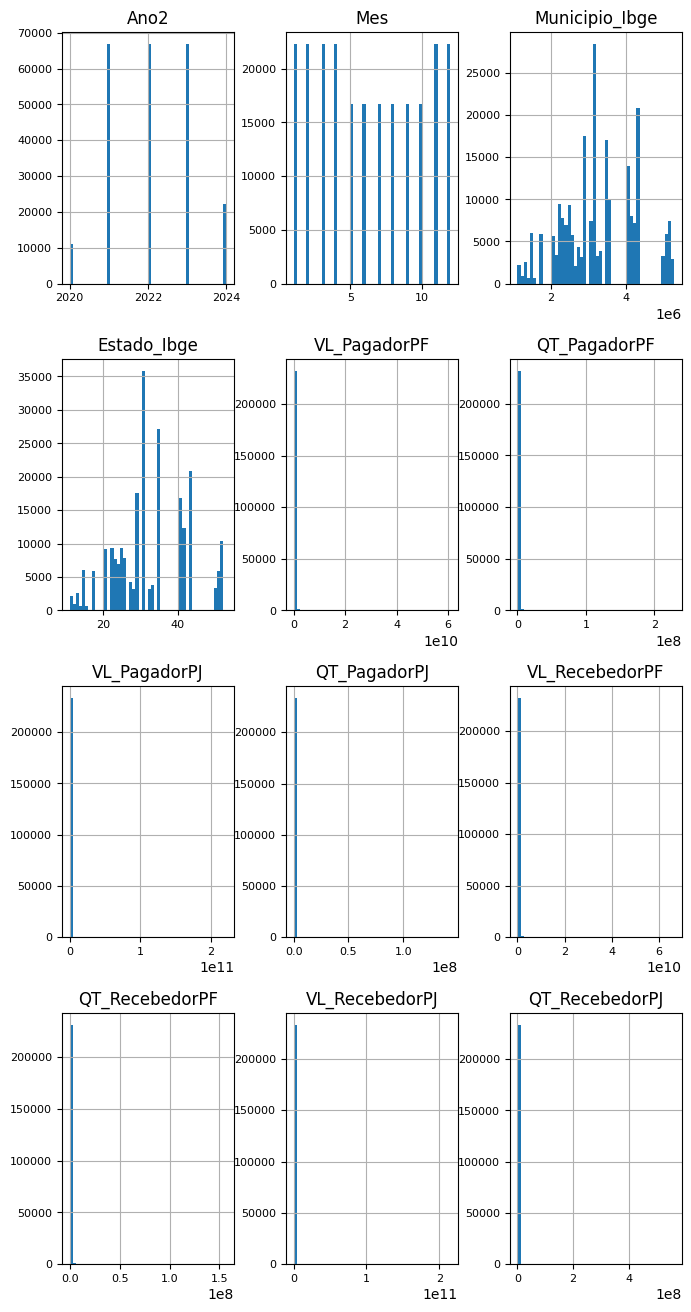

In [50]:
dados_pix.hist(figsize=(8,16),bins=50, xlabelsize=8,ylabelsize=8);

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


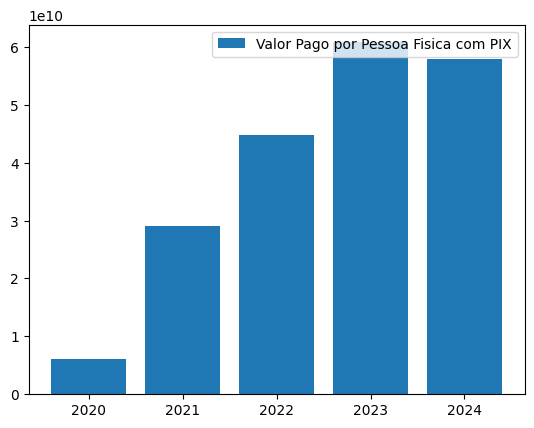

In [51]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_PagadorPF'],label='Valor Pago por Pessoa Fisica com PIX')
plt.legend()
plt.show()

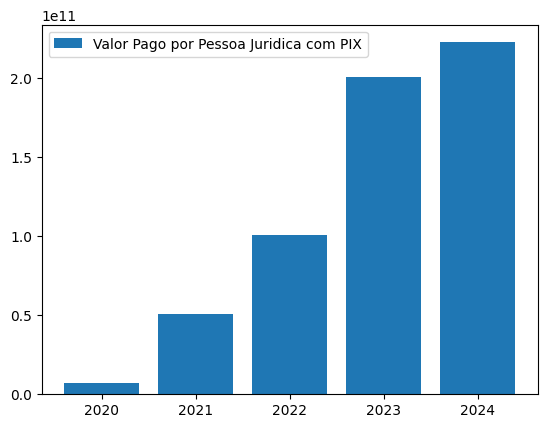

In [53]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_PagadorPJ'],label='Valor Pago por Pessoa Juridica com PIX')
plt.legend()
plt.show()

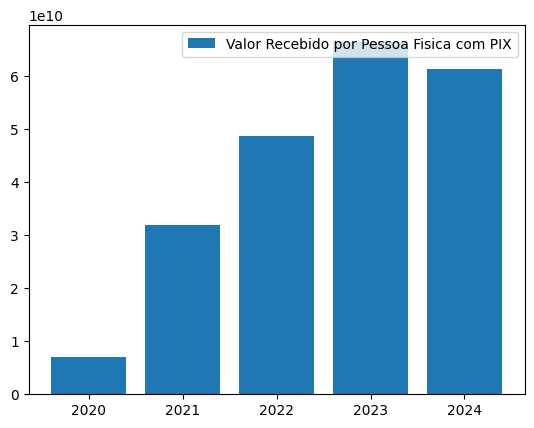

In [55]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_RecebedorPF'],label='Valor Recebido por Pessoa Fisica com PIX')
plt.legend()
plt.show()

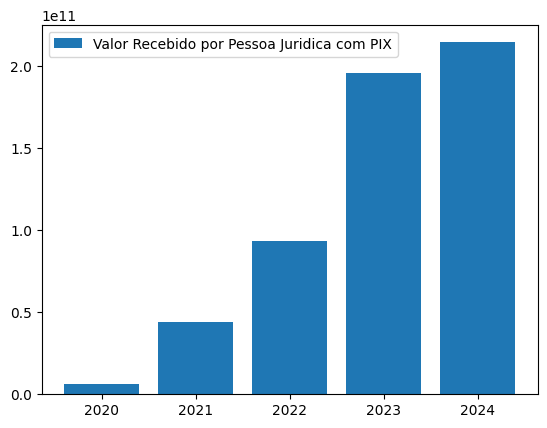

In [61]:
plt.bar(dados_pix['Ano2'],dados_pix['VL_RecebedorPJ'],label='Valor Recebido por Pessoa Juridica com PIX')
plt.legend()
plt.show()

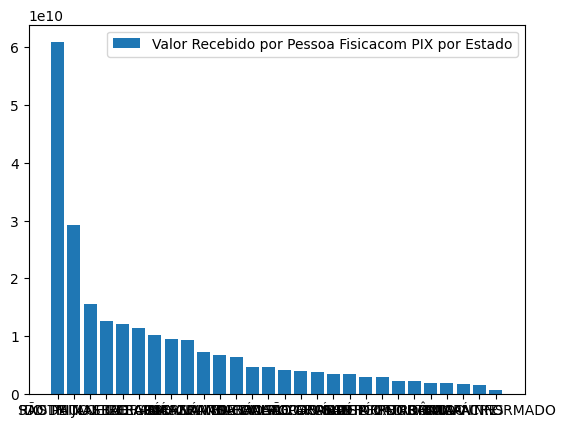

In [60]:
plt.bar(dados_pix['Estado'],dados_pix['VL_PagadorPF'],label='Valor Recebido por Pessoa Fisica com PIX por Estado')
plt.legend()
plt.show()